In [66]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as plt

In [70]:
from sklearn.preprocessing import minmax_scale as minmax_scaling

In [3]:
nfl_data=pd.read_csv(r'C:\Users\richardpears\Desktop\python\Datasets\Kaggle\NFL Play by Play 2009-2017 (v4).csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
sf_permits=pd.read_csv(r'C:\Users\richardpears\Desktop\python\Datasets\Kaggle\Building_Permits.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
nfl_data.head(10)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
5,2009-09-10,2009091000,2,1,1.0,13:16,14,3496.0,11.0,TEN,...,NaN,0.558929,0.441071,0.578453,0.421547,0.441071,-0.019524,NaN,NaN,2009
6,2009-09-10,2009091000,2,1,2.0,12:40,13,3460.0,36.0,TEN,...,0.163935,0.578453,0.421547,0.582881,0.417119,0.421547,-0.004427,-0.010456,0.006029,2009
7,2009-09-10,2009091000,2,1,3.0,12:11,13,3431.0,29.0,TEN,...,NaN,0.582881,0.417119,0.617544,0.382456,0.417119,-0.034663,NaN,NaN,2009
8,2009-09-10,2009091000,2,1,4.0,11:34,12,3394.0,37.0,TEN,...,NaN,0.617544,0.382456,0.591489,0.408511,0.382456,0.026054,NaN,NaN,2009
9,2009-09-10,2009091000,3,1,1.0,11:24,12,3384.0,10.0,TEN,...,0.541602,0.591489,0.408511,0.585405,0.414595,0.591489,-0.006084,-0.024526,0.018442,2009


In [6]:
list(nfl_data).count(all)

0

In [7]:
list(sf_permits)

['Permit Number',
 'Permit Type',
 'Permit Type Definition',
 'Permit Creation Date',
 'Block',
 'Lot',
 'Street Number',
 'Street Number Suffix',
 'Street Name',
 'Street Suffix',
 'Unit',
 'Unit Suffix',
 'Description',
 'Current Status',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'Completed Date',
 'First Construction Document Date',
 'Structural Notification',
 'Number of Existing Stories',
 'Number of Proposed Stories',
 'Voluntary Soft-Story Retrofit',
 'Fire Only Permit',
 'Permit Expiration Date',
 'Estimated Cost',
 'Revised Cost',
 'Existing Use',
 'Existing Units',
 'Proposed Use',
 'Proposed Units',
 'Plansets',
 'TIDF Compliance',
 'Existing Construction Type',
 'Existing Construction Type Description',
 'Proposed Construction Type',
 'Proposed Construction Type Description',
 'Site Permit',
 'Supervisor District',
 'Neighborhoods - Analysis Boundaries',
 'Zipcode',
 'Location',
 'Record ID']

In [8]:
miss_values=nfl_data.isnull().sum()

In [9]:
miss_values

Date                                0
GameID                              0
Drive                               0
qtr                                 0
down                            61154
time                              224
TimeUnder                           0
TimeSecs                          224
PlayTimeDiff                      444
SideofField                       528
yrdln                             840
yrdline100                        840
ydstogo                             0
ydsnet                              0
GoalToGo                          840
FirstDown                       28811
posteam                         24992
DefensiveTeam                   24992
desc                                2
PlayAttempted                       0
Yards.Gained                        0
sp                                  0
Touchdown                           0
ExPointResult                  397578
TwoPointConv                   407083
DefTwoPoint                    407664
Safety      

In [10]:
totalnumber_cells=np.product(nfl_data.shape)

totalmissing=miss_values.sum()


In [11]:
percentage_missing=(totalmissing/totalnumber_cells)*100

In [12]:
percentage_missing

24.87214126835169

In [13]:
sfmissing_values=sf_permits.isnull().sum()

In [14]:
sfmissing_values.head(10)

Permit Number                  0
Permit Type                    0
Permit Type Definition         0
Permit Creation Date           0
Block                          0
Lot                            0
Street Number                  0
Street Number Suffix      196684
Street Name                    0
Street Suffix               2768
dtype: int64

In [15]:
sftotal_cells=np.product(sf_permits.shape)
sftotal_cells

8552700

In [16]:
x=sfmissing_values.sum()
x

2245941

In [17]:
sfpercent_missing=(x/sftotal_cells)*100

In [18]:
sfpercent_missing

26.26002315058403

In [19]:
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [20]:
nfl_data

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
5,2009-09-10,2009091000,2,1,1.0,13:16,14,3496.0,11.0,TEN,...,NaN,0.558929,0.441071,0.578453,0.421547,0.441071,-0.019524,NaN,NaN,2009
6,2009-09-10,2009091000,2,1,2.0,12:40,13,3460.0,36.0,TEN,...,0.163935,0.578453,0.421547,0.582881,0.417119,0.421547,-0.004427,-0.010456,0.006029,2009
7,2009-09-10,2009091000,2,1,3.0,12:11,13,3431.0,29.0,TEN,...,NaN,0.582881,0.417119,0.617544,0.382456,0.417119,-0.034663,NaN,NaN,2009
8,2009-09-10,2009091000,2,1,4.0,11:34,12,3394.0,37.0,TEN,...,NaN,0.617544,0.382456,0.591489,0.408511,0.382456,0.026054,NaN,NaN,2009
9,2009-09-10,2009091000,3,1,1.0,11:24,12,3384.0,10.0,TEN,...,0.541602,0.591489,0.408511,0.585405,0.414595,0.591489,-0.006084,-0.024526,0.018442,2009


In [21]:
nfldroppedna=nfl_data.dropna(axis=1)

In [22]:
nfldroppedna.shape

(407688, 41)

In [23]:
sf_permits.shape[1]

43

In [24]:
nfldroppedna.shape[1]

41

In [25]:
nflfilled=nfl_data.fillna(0)

In [26]:
nflfilled

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,0.0,15:00,15,3600.0,0.0,TEN,...,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009
5,2009-09-10,2009091000,2,1,1.0,13:16,14,3496.0,11.0,TEN,...,0.000000,0.558929,0.441071,0.578453,0.421547,0.441071,-0.019524,0.000000,0.000000,2009
6,2009-09-10,2009091000,2,1,2.0,12:40,13,3460.0,36.0,TEN,...,0.163935,0.578453,0.421547,0.582881,0.417119,0.421547,-0.004427,-0.010456,0.006029,2009
7,2009-09-10,2009091000,2,1,3.0,12:11,13,3431.0,29.0,TEN,...,0.000000,0.582881,0.417119,0.617544,0.382456,0.417119,-0.034663,0.000000,0.000000,2009
8,2009-09-10,2009091000,2,1,4.0,11:34,12,3394.0,37.0,TEN,...,0.000000,0.617544,0.382456,0.591489,0.408511,0.382456,0.026054,0.000000,0.000000,2009
9,2009-09-10,2009091000,3,1,1.0,11:24,12,3384.0,10.0,TEN,...,0.541602,0.591489,0.408511,0.585405,0.414595,0.591489,-0.006084,-0.024526,0.018442,2009


In [27]:
nflreplace_simillardata=nfl_data.fillna(method='bfill',axis=(0)).fillna(0)

In [28]:
sfreplace_simillardata=sf_permits.fillna(method='bfill',axis=(0)).fillna(0)

In [29]:
nflreplace_simillardata.sample(15);
sfreplace_simillardata.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
46632,M484567,8,otc alterations permit,05/01/2014,3583,096,172,A,Hartford,St,...,5.0,wood frame (5),1.0,constr type 1,Y,8.0,Castro/Upper Market,94114.0,"(37.759801268235734, -122.43410618751788)",1340445411702
19269,201307222453,8,otc alterations permit,07/22/2013,0078,041,361,A,Lombard,St,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,North Beach,94133.0,"(37.803278454169636, -122.40744594868872)",1311779348411
119969,M679247,8,otc alterations permit,04/05/2016,5322,020,1696,A,Palou,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,10.0,Bayview Hunters Point,94124.0,"(37.73516781222157, -122.39246949072714)",1418594179148
28450,201310189731,8,otc alterations permit,10/18/2013,5721,067,378,A,Park,St,...,5.0,wood frame (5),5.0,wood frame (5),Y,9.0,Bernal Heights,94110.0,"(37.736131400286986, -122.41737978207891)",1321406187836
175881,201704144008,8,otc alterations permit,04/14/2017,2069,010,2547,B,Noriega,St,...,5.0,wood frame (5),5.0,wood frame (5),Y,4.0,Sunset/Parkside,94122.0,"(37.75333780350855, -122.4909201441627)",1459612391796


In [33]:
ex_dat=np.random.exponential(size=1500)
ex_dat

array([0.12487744, 0.52170381, 1.21244944, ..., 2.20566047, 1.64976369,
       1.05811156])

In [55]:
from sklearn.preprocessing import minmax_scale

In [ ]:
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

fig, ax=plt.subplots(1, 2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

In [75]:
ks_2017 = pd.read_csv(r"C:\Users\richardpears\Desktop\python\Datasets\Kaggle\ks-projects-201801.csv")


In [76]:
ks_2017

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [79]:
positive=ks_2017.usd_pledged_real>0

In [80]:
positive

0         False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10        False
11         True
12        False
13        False
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26        False
27         True
28         True
29         True
          ...  
378631     True
378632    False
378633     True
378634     True
378635     True
378636     True
378637     True
378638     True
378639     True
378640     True
378641    False
378642     True
378643    False
378644     True
378645     True
378646     True
378647     True
378648     True
378649     True
378650    False
378651     True
378652     True
378653     True
378654     True
378655    False
378656     True
378657     True
378658     True
378659     True
378660     True
Name: usd_pledged_real, 

In [81]:
positive_pledges=ks_2017.usd_pledged_real.loc[positive]

In [82]:
positive_pledges

1           2421.00
2            220.00
3              1.00
4           1283.00
5          52375.00
6           1205.00
7            453.00
8           8233.00
9           6240.57
11         12700.00
14        121857.33
15           664.00
16           395.00
17           789.00
18           250.00
19          1781.00
20         34268.00
21             0.81
22           650.00
23             6.29
24           701.66
25         15827.00
27         42174.03
28           160.60
29         57577.31
30            31.09
31         47266.00
32          1427.35
33          1395.00
34         13260.00
            ...    
378625      4005.00
378626        50.00
378627      1723.53
378629      2090.00
378630      1920.56
378631     13861.50
378633     11643.00
378634      3531.00
378635        70.00
378636      4686.96
378637     10245.00
378638        18.00
378639      5579.00
378640       100.00
378642      1452.47
378644      6169.00
378645      4374.99
378646      1732.02
378647       980.00


In [101]:
norm_pledges=stats.boxcox(positive_pledges)[0]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


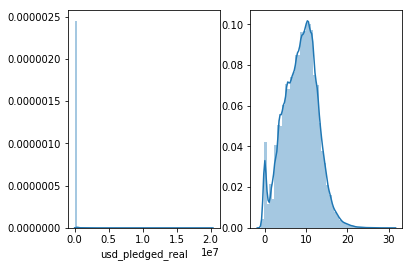

In [104]:
fig,ax=plt.subplots(1,2)
sns.distplot(positive_pledges,ax=ax[0])
sns.distplot(norm_pledges,ax=ax[1])
plt.show()

 

In [ ]:
# refer to kaggle for further excercises on data cleaning